<a href="https://colab.research.google.com/github/SevindzhK/Python_edu/blob/main/jupyter_nb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [ ]:
df = pd.read_csv('train (2).csv')

**Survived** — выжил данный пассажир или нет (0 для умерших, 1 для выживших)

**Pclass** — класс пассажира (1 — высший, 2 — средний, 3 — низший);

**Name** — имя;

**Sex** — пол;

**Age** — возраст;

**SibSp** — количество братьев, сестер, сводных братьев, сводных сестер, супругов на борту титаника;

**Parch** — количество родителей, детей (в том числе приемных) на борту титаника;

**Ticket** — номер билета;

**Fare** — плата за проезд;

**Cabin** — каюта;

**Embarked** — порт посадки (C — Шербур; Q — Квинстаун; S — Саутгемптон)

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df.Survived.value_counts(normalize=True).mul(100).round(2)

0    61.62
1    38.38
Name: Survived, dtype: float64

Здесь представлены данные по погибшим (0) и выжившим (1) в процентном соотношении.  
Ниже приведено количество погибших (549 чел.) и выживших (342 чел.)

In [ ]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

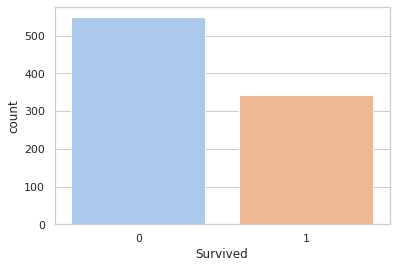

In [ ]:
sns.set_theme(style="whitegrid", palette="pastel")
sns.countplot(x=df["Survived"])

In [ ]:
df.query('Survived == 1').groupby('Pclass', as_index=False).agg({'Survived' : 'count'})


,Pclass,Survived
0,1,136
1,2,87
2,3,119


В таблице выше приведены данные по выжившим относительно пассажирского класса.  На графике четко прослеживается корреляция спасения человека в зависимости от его пассажирского класса. 

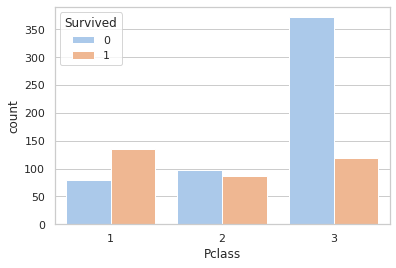

In [ ]:
sns.countplot(data=df, x="Pclass", hue="Survived")

In [ ]:
rescue_into_class_1 = df.query('Survived == 1').groupby('Pclass', as_index=False).agg({'Survived' : 'count'})
rescue_into_class_1

,Pclass,Survived
0,1,136
1,2,87
2,3,119


In [ ]:
def percent(total, num):
  percent_resc = num/total * 100
  return percent_resc.round(1) 

In [68]:
rescue_into_class = df.groupby('Pclass', as_index=False).agg({'Survived' : 'count'})\
                      .rename(columns={'Survived' : 'Total'})
rescue_into_class.insert(2, 'Rescue', [136, 87, 199], False)
rescue_into_class['Percent'] = percent(rescue_into_class.Total, rescue_into_class.Rescue)
rescue_into_class

,Pclass,Total,Rescue,Percent
0,1,216,136,63.0
1,2,184,87,47.3
2,3,491,199,40.5


В таблице приведены данные по спасшимся в процентном соотношении: доля спасшихся пассажиров 1 класса в среднем в 1,5 раза выше, чем пассажиров других двух классов. 

In [73]:
def lucky_ticket(s):
	try:
		s = int(s)
		s = list(filter(lambda i:(i),str(s))) 
		if len(s) % 2 == 0:
			start = 0
			end = len(s) - 1
			sum_start = 0
			sum_end = 0
			while start < end:
				sum_start += int(s[start])
				sum_end += int(s[end])
				start += 1
				end -= 1
			if sum_start == sum_end:
				s = 1
			else: 
				s = 0
		else:
			s = 0		
	except:
		s = 0 
	return s

In [79]:
df['Lucky_ticket'] = lucky_ticket(df.Ticket)
df.query('Lucky_ticket == 1').shape[0] 

0

Увы, ни у одного пассажира не оказалось счастливого билета. Иначе у такого бы счастливчика шансы на спасение были бы в разы выше, чем у других! 